## Audio Classification Data Preprocessing


In [1]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='data/UrbanSound8K/audio/fold2/4201-3-1-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[-2.2351742e-08  1.8626451e-09  0.0000000e+00 ... -3.1899016e-02
 -8.4464632e-02 -1.1315060e-01]


In [3]:
librosa_sample_rate

22050

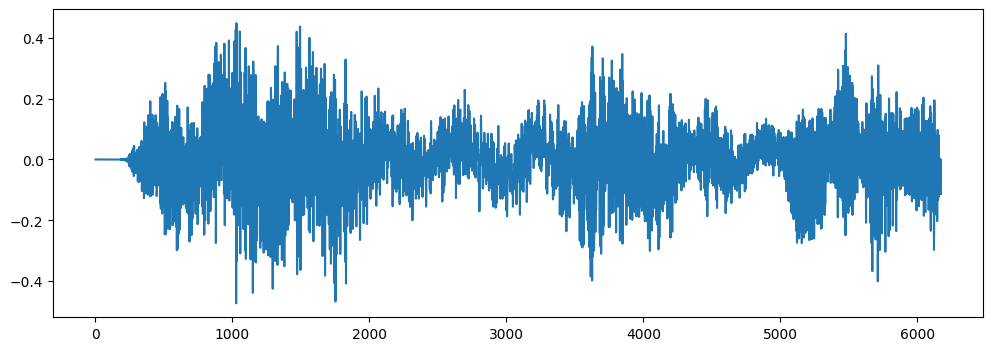

In [4]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
import IPython.display as ipd
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

ipd.Audio(audio_file_path)

In [5]:
# Observation

# Here Librosa converts the signal to mono, meaning the channel will always be 1

In [6]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [7]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-3591, -3050],
       [-3659, -3469],
       [-3279, -3609]], dtype=int16)

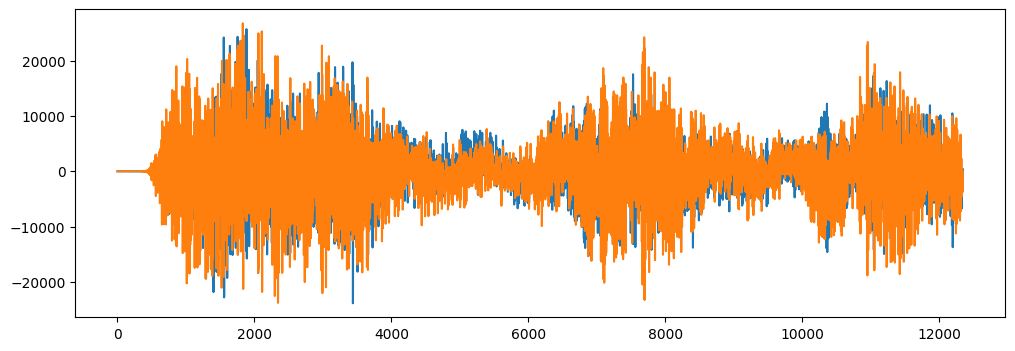

In [8]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [9]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 13)


In [10]:
mfccs

array([[-2.59456848e+02, -1.43480179e+02, -9.77050323e+01,
        -8.78411942e+01, -1.04981995e+02, -1.27920097e+02,
        -1.28247513e+02, -1.25512619e+02, -1.32782822e+02,
        -1.51421890e+02, -1.54786362e+02, -1.31297531e+02,
        -1.44689209e+02],
       [-1.20550079e+01, -2.06273985e+00,  1.46859875e+01,
         3.50782738e+01,  5.35959320e+01,  6.15849380e+01,
         5.88338623e+01,  3.23234596e+01,  9.95318985e+00,
         9.52701092e+00,  9.24252510e+00,  3.53292012e+00,
         5.60966778e+00],
       [ 1.52711391e+01,  1.09967041e+00, -1.63742390e+01,
        -3.76550140e+01, -4.84380150e+01, -3.81879730e+01,
        -1.96962051e+01, -1.76294193e+01, -2.34345303e+01,
        -2.10707874e+01, -2.40439034e+01, -3.27840805e+01,
        -2.69857597e+01],
       [ 8.81578293e+01,  8.08943024e+01,  7.55463715e+01,
         7.26776123e+01,  5.97029190e+01,  4.74252396e+01,
         5.09152527e+01,  6.58544769e+01,  8.13030930e+01,
         7.29674835e+01,  6.83005066e

In [11]:
#### Extracting MFCC's For every audio file
import pandas as pd
import numpy as np
import os
import librosa

audio_dataset_path='data/UrbanSound8K/audio/'
metadata=pd.read_csv('data/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
def features_extractor(file):
    audio, sample_rate = librosa.load( file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [13]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]

3554it [03:03, 19.94it/s]c:\Users\yashr\anaconda3\envs\audioclf\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [06:54, 25.60it/s]c:\Users\yashr\anaconda3\envs\audioclf\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\Users\yashr\anaconda3\envs\audioclf\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [07:12, 20.17it/s]


In [31]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [32]:
extracted_features_df.to_csv('artifacts/preprocessed_data.csv')

In [15]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [16]:

X.shape

(8732, 40)

In [17]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [18]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [20]:
y.shape

(8732, 10)

In [21]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train

array([[-1.3110471e+02,  1.1250591e+02, -2.2574696e+01, ...,
         3.2466526e+00, -1.3690238e+00,  2.7557547e+00],
       [-1.3670342e+01,  9.1085083e+01, -7.7927332e+00, ...,
        -3.2530503e+00, -5.2774525e+00, -1.5569715e+00],
       [-4.9871544e+01,  2.6535282e-01, -2.0500937e+01, ...,
         2.8545945e+00, -1.6092046e+00,  3.5248058e+00],
       ...,
       [-4.2701236e+02,  9.2623047e+01,  3.1293976e+00, ...,
         7.4264127e-01,  7.3349077e-01,  7.1100914e-01],
       [-1.4575461e+02,  1.3626578e+02, -3.3515522e+01, ...,
         1.4681194e+00, -2.0091701e+00, -8.8218188e-01],
       [-4.2103134e+02,  2.1065454e+02,  3.4906607e+00, ...,
        -5.3888674e+00, -3.3713605e+00, -1.5665114e+00]], dtype=float32)

In [23]:
X_train.shape

(6985, 40)

In [24]:
X_test.shape

(1747, 40)

In [25]:
y_train.shape

(6985, 10)

In [26]:
y_test.shape

(1747, 10)